In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
import pylab as P
import tensorflow as tf

In [7]:
data = pd.read_csv('/home/adioshun/Jupyter/Example/Titnic_train.csv')

In [16]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [10]:
# print(data.describe(include = 'all'))
data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [20]:
def slice_by_survived(f):
    survived_feature = data['Survived'] # data의 survied 열만 뽑아서 survied_feature생성 
    alive = data[(survived_feature == 1) & (f.isnull() == False)][feature]
    dead = data[(survived_feature == 0) & (f.isnull() == False)][feature]

    return np.array(alive, dtype='float'), np.array(dead, dtype='float')

numerical_features = [
    ['Age'],
    ['Fare'],
    ['Parch'],
    ['SibSp'],
]

for features in numerical_features:  # numerical_features의 내용을 순서대로 features에 넣기 
    f = None
    for feature in features: # 
        if f is None:
            f = data[feature]
        else:
            f *= data[feature]
    alive, dead = slice_by_survived(f)
    plt.figure()
    plt.title('X'.join(features))
    plt.bar([0, 1], [alive.mean(), dead.mean()], color=['blue', 'red'])
    plt.figure()

/home/adioshun/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


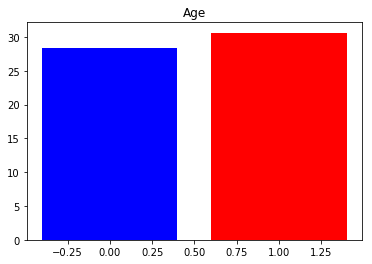

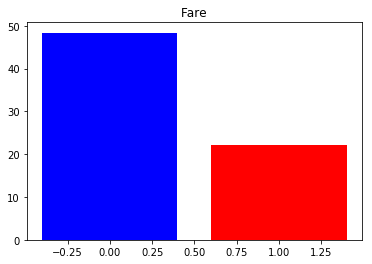

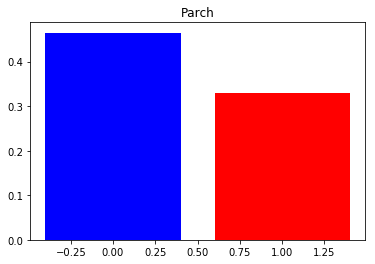

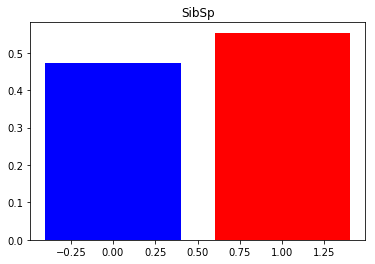

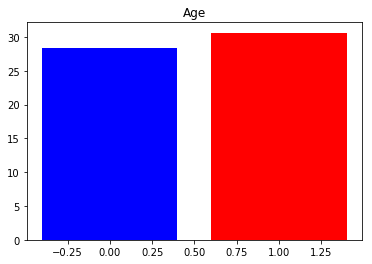

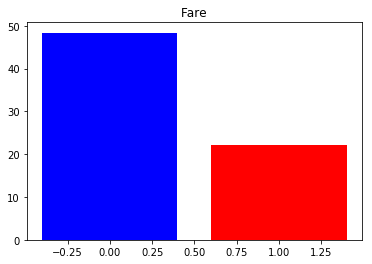

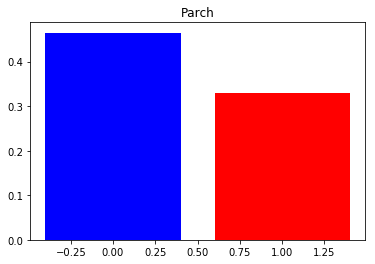

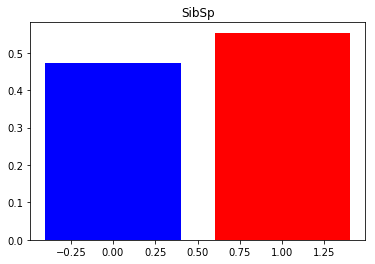

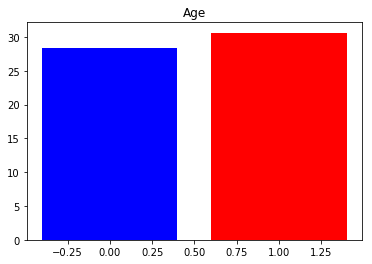

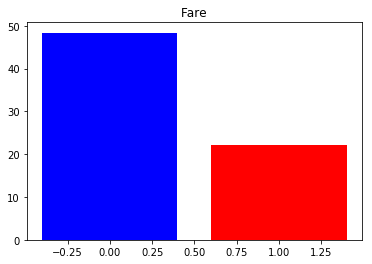

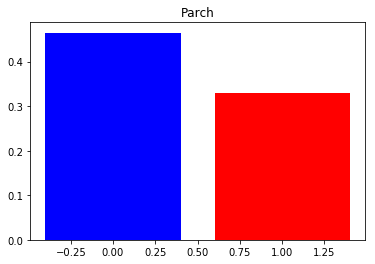

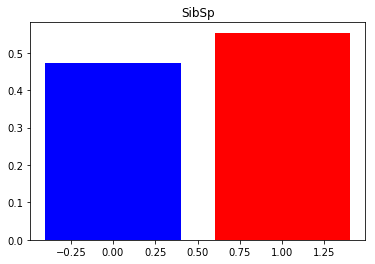

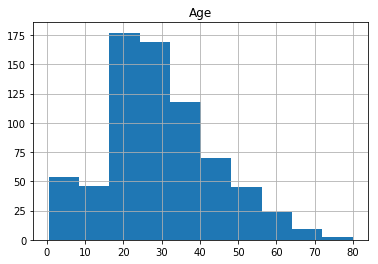

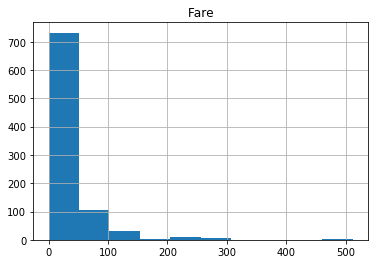

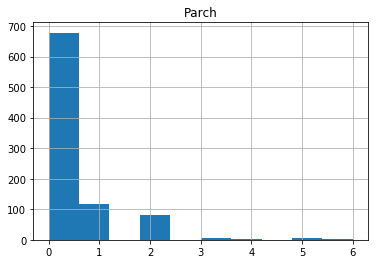

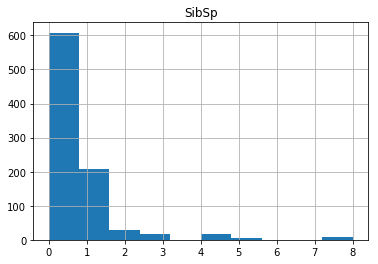

In [21]:
for feature in numerical_features:
    data[feature].hist()
    P.show()

In [24]:
# Prepare Age feature
def PrepareAge(data):
    age = data['Age'].copy()
    mean_age = age.mean()
    print('Mean age: {}'.format(mean_age))
    age[age.isnull()] = mean_age
    return age

In [25]:
# Prepare categorical feature
def PrepareCat(data, feature):
    f = data[feature]
    classes = sorted(x for x in set(f) if type(x) != float or not math.isnan(x))
    print(classes)
    if len(classes) <= 2:
        out = pd.DataFrame({feature:(f == classes[0]).map({True:1, False:0})})
        return out
    ones = np.ones(len(f))
    out = pd.DataFrame({('{}_{}'.format(feature, c)):(f == c).map({True:1, False:0}) for c in classes})
    return out

In [26]:
def Merge(d1, d2):
    output = pd.DataFrame()
    for f in d1:
        output[f] = d1[f].copy()
    for f in d2:
        output[f] = d2[f].copy()
    return output

In [27]:
print(PrepareCat(data, 'Embarked').describe())

['C', 'Q', 'S']
       Embarked_C  Embarked_Q  Embarked_S
count  891.000000  891.000000  891.000000
mean     0.188552    0.086420    0.722783
std      0.391372    0.281141    0.447876
min      0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000
50%      0.000000    0.000000    1.000000
75%      0.000000    0.000000    1.000000
max      1.000000    1.000000    1.000000


In [28]:
def CrossCat(data, features):
    name = '*'.join(features)
    p = None
    for f in features:
        s = pd.Series(str(x) for x in data[f])
        p = s if p is None else (p + '*' + s)
        p[data[f].isnull()] = math.nan
    out = pd.DataFrame()
    out[name] = p
    return PrepareCat(out, name)

In [29]:
def PrepareFeatures(data):
    output = pd.DataFrame()
    output['Age'] = PrepareAge(data) / 80
    output['Fare'] = data['Fare'] / 512
    output['Parch'] = data['Parch'] / 6
    output['SibSp'] = data['SibSp'] / 8
    output = Merge(output, PrepareCat(data, 'Sex'))
    output = Merge(output, PrepareCat(data, 'Pclass'))
    output = Merge(output, PrepareCat(data, 'Embarked'))
    output['Sex_Age'] = output['Age']*output['Sex']
    output['Sex_Fare'] = output['Fare']*output['Sex']
    output = Merge(output, CrossCat(data, ['Sex', 'Embarked']))
    output = Merge(output, CrossCat(data, ['Sex', 'Pclass']))
    return output

In [30]:
def PrepareTarget(data):
    return np.array(data.Survived, dtype='int8').reshape(-1, 1)

In [32]:
training_data = PrepareFeatures(data)
target_training_data = PrepareTarget(data)
training_data = np.array(training_data, dtype='float32')

Mean age: 29.6991176471
['female', 'male']
[1, 2, 3]
['C', 'Q', 'S']


AttributeError: 'module' object has no attribute 'nan'

In [33]:
print(training_data[training_data['Age'].isnull()])

NameError: name 'training_data' is not defined

In [34]:
print(training_data.describe())

NameError: name 'training_data' is not defined

In [35]:
print(training_data.info())

NameError: name 'training_data' is not defined

In [36]:
print (training_data)

NameError: name 'training_data' is not defined